In [734]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.io.fits as fits
from glob import glob

In [735]:
pers_res = pd.read_csv('pers_res.csv')

apf_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/apf_data_files/'
observed_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/observed_data_files/'
rest_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/rest_data_files/'
resid_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/resid_data_files/'

APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl_image = wl_file[0].data

In [736]:
stars = ['HIP84862',
 'HIP14286', #
 'HIP50384',
 'HIP67301', #
 'HIP68030', #
 'HIP73695', #
 'HIP77760', #
 'HIP14576', #
 'HIP36152',
 'HIP93747', #
 'HIP91919', #
 'HIP91926', #
 'HIP97649', #
 'HIP677',   #
 'HIP107975',#
 'HIP114430' ] # 

In [737]:
# all_chi = []
# for star in stars:
#     sub_table = pers_res[pers_res['star'] == star]
#     chi = list(sub_table['best_mean_chi_squared'])
#     all_chi += chi

In [738]:
# plt.hist(all_chi)
# plt.xlabel('Chi-squred Value')
# plt.ylabel('Count')
# plt.title('Distribution of chi-squared values of all spectra with final events')
# plt.show()

In [817]:
star = 'HIP68030'

pers_res[pers_res['star'] == star]

,Unnamed: 0,Unnamed: 0.1,star,identifier,r shifted wl,r unshifted wl,r heights,r AMD heights,rounded r shifted wl,observation time,rounded r unshifted wl,name,best_mean_chi_squared
17,17,63,HIP68030,HIP68030_2,5014.195018,5014.313829,0.108921,6.402652,5014.20,2017-05-14T06:36:48.60,5014.32,HIP68030_2,1.84
18,18,50,HIP68030,HIP68030_0,5014.195018,5014.313829,0.110437,6.167016,5014.20,2017-05-14T06:29:09.62,5014.32,HIP68030_0,1.81
19,19,54,HIP68030,HIP68030_1,5014.195018,5014.313829,0.107112,6.721232,5014.20,2017-05-14T06:21:30.41,5014.32,HIP68030_1,1.69
26,26,78,HIP68030,HIP68030_5,5049.887952,5050.093080,0.133824,7.255689,5049.88,2020-05-29T05:35:37.52,5050.10,HIP68030_5,1.55
27,27,64,HIP68030,HIP68030_3,5049.887952,5050.093080,0.126120,7.442679,5049.88,2020-05-29T05:26:57.22,5050.10,HIP68030_3,1.58
28,28,69,HIP68030,HIP68030_4,5049.887952,5050.093080,0.134680,7.887471,5049.88,2020-05-29T05:31:16.21,5050.10,HIP68030_4,9.39
29,29,55,HIP68030,HIP68030_1,5049.922229,5050.041886,0.135418,7.362205,5049.92,2017-05-14T06:21:30.41,5050.04,HIP68030_1,1.69
30,30,62,HIP68030,HIP68030_2,5049.922229,5050.041886,0.142930,7.629842,5049.92,2017-05-14T06:36:48.60,5050.04,HIP68030_2,1.84
31,31,53,HIP68030,HIP68030_0,5049.922229,5050.041886,0.147432,7.726648,5049.92,2017-05-14T06:29:09.62,5050.04,HIP68030_0,1.81
32,32,91,HIP68030,HIP68030_7,5083.263782,5083.504681,0.098514,6.884333,5083.26,2020-06-05T05:51:38.20,5083.50,HIP68030_7,3.58


In [818]:
observed_wl = 	5896.006220
rest_wl = 5895.866519

# observed_wl = 5405.7
# rest_wl = 5405.7

In [819]:
apf_files = np.load(apf_directory + star + '.npy')
observed_files = np.load(observed_directory + star + '.npy')
rest_files = np.load(rest_directory + star + '.npy')
resid_files = np.load(resid_directory + star + '.npy')

In [820]:
arr = np.round(wl_image, 1) == np.round(observed_wl, 1)
order = np.where(arr)[0][0]

## Plot SM residuals in rest frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP68030_0_NDRR.fits
HIP68030
2017-05-14T06:29:09.62


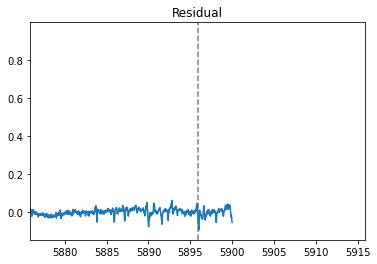

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP68030_1_NDRR.fits
HIP68030
2017-05-14T06:21:30.41


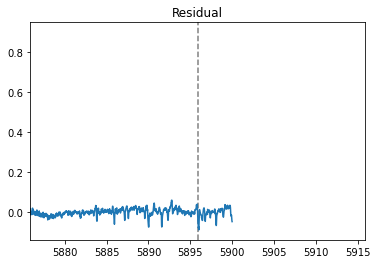

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP68030_2_NDRR.fits
HIP68030
2017-05-14T06:36:48.60


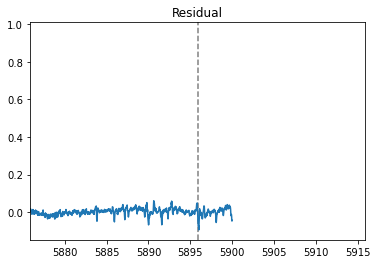

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP68030_3_NDRR.fits
HIP68030
2020-05-29T05:26:57.22


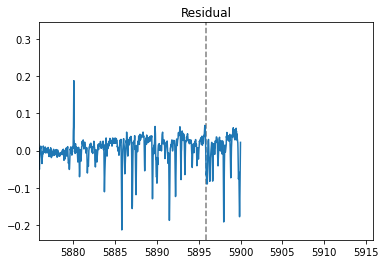

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP68030_4_NDRR.fits
HIP68030
2020-05-29T05:31:16.21


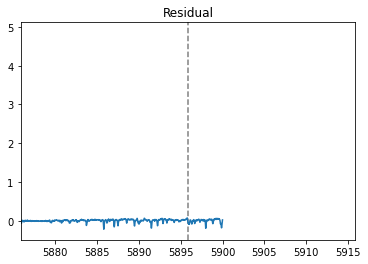

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP68030_5_NDRR.fits
HIP68030
2020-05-29T05:35:37.52


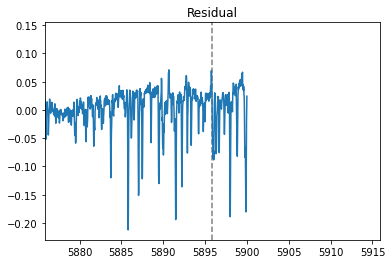

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP68030_6_NDRR.fits
HIP68030
2020-06-05T05:38:57.75


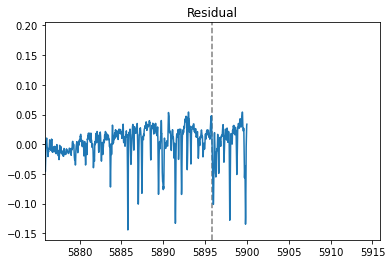

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP68030_7_NDRR.fits
HIP68030
2020-06-05T05:51:38.20


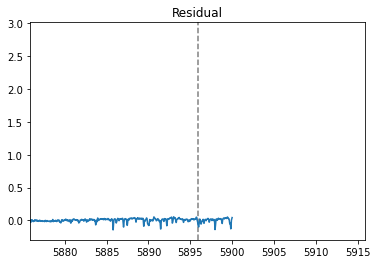

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP68030_8_NDRR.fits
HIP68030
2020-06-05T05:45:14.14


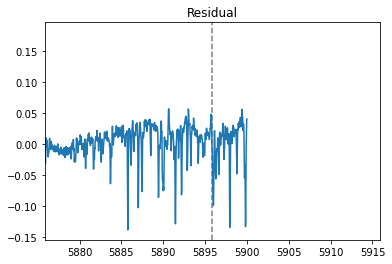

In [821]:
for file in resid_files:
    subfile = fits.open(file)
    flux = subfile[1].data
    wl = subfile[2].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.axvline(rest_wl, ls='--', color='gray')
    plt.plot(wl, flux)
    plt.xlim(rest_wl-20, rest_wl+20)
    plt.title('Residual')
    plt.show()

## Plot SM spectra in rest frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP68030_0_NDRS.fits
HIP68030
2017-05-14T06:29:09.62
5895.866519


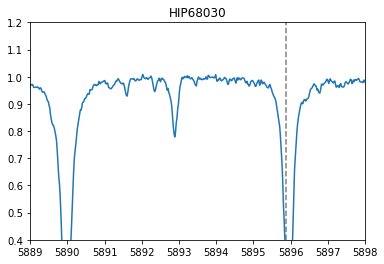

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP68030_1_NDRS.fits
HIP68030
2017-05-14T06:21:30.41
5895.866519


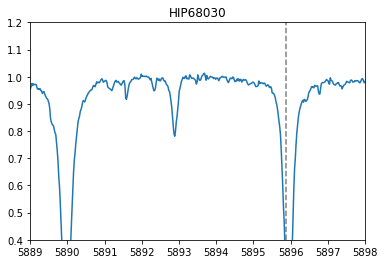

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP68030_2_NDRS.fits
HIP68030
2017-05-14T06:36:48.60
5895.866519


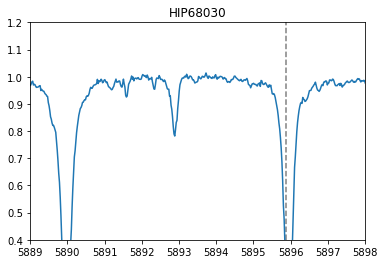

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP68030_3_NDRS.fits
HIP68030
2020-05-29T05:26:57.22
5895.866519


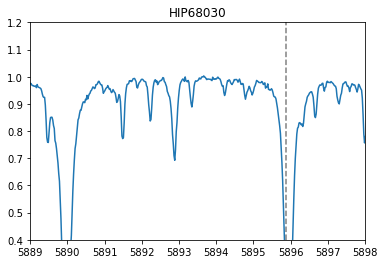

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP68030_4_NDRS.fits
HIP68030
2020-05-29T05:31:16.21
5895.866519


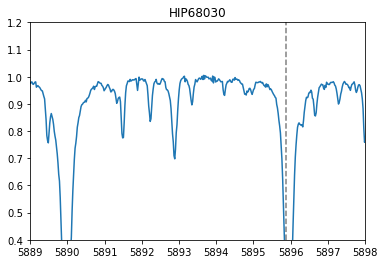

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP68030_5_NDRS.fits
HIP68030
2020-05-29T05:35:37.52
5895.866519


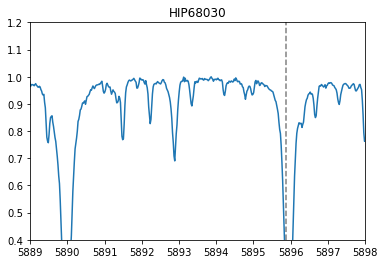

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP68030_6_NDRS.fits
HIP68030
2020-06-05T05:38:57.75
5895.866519


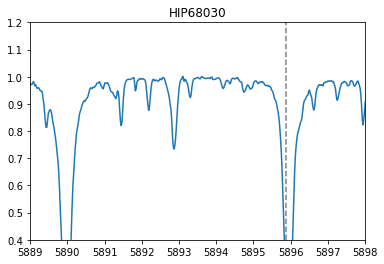

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP68030_7_NDRS.fits
HIP68030
2020-06-05T05:51:38.20
5895.866519


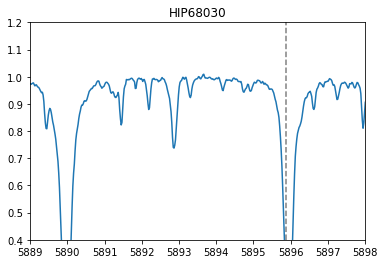

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP68030_8_NDRS.fits
HIP68030
2020-06-05T05:45:14.14
5895.866519


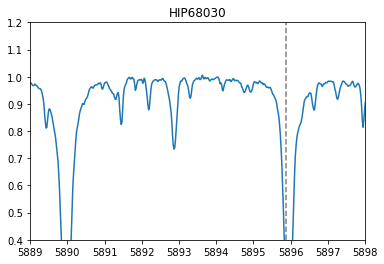

In [822]:
for file in rest_files:
    if 'NDRR' in file:
        print('skipped')
        continue
    subfile = fits.open(file)
    flux = subfile[0].data
    wl = subfile[1].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.axvline(rest_wl, ls='--', color='gray')
    print(rest_wl)
    plt.plot(wl, flux)
    plt.xlim(rest_wl - 8, rest_wl + 6)
    plt.xlim(5889, 5898)
    plt.ylim(0.4, 1.2)
    plt.title(star)
    plt.show()

## Plot SM spectra in observed frame

No handles with labels found to put in legend.


/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP68030_0_NDRU.fits
HIP68030
2017-05-14T06:29:09.62


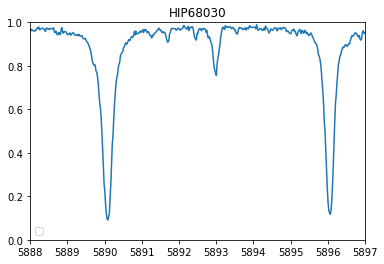

No handles with labels found to put in legend.


5899.98996409431
5000.005552883154
5895.98622
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP68030_1_NDRU.fits
HIP68030
2017-05-14T06:21:30.41


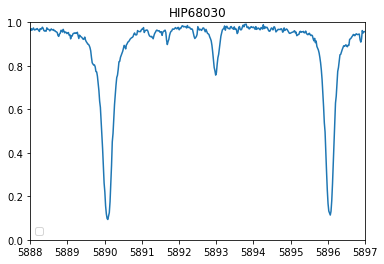

No handles with labels found to put in legend.


5899.98996409431
5000.005552883154
5895.98622
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP68030_2_NDRU.fits
HIP68030
2017-05-14T06:36:48.60


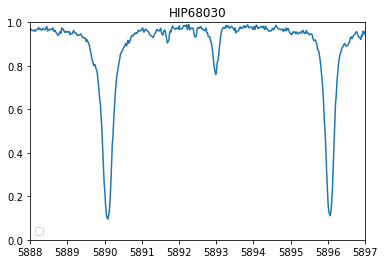

No handles with labels found to put in legend.


5899.98996409431
5000.005552883154
5895.98622
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP68030_3_NDRU.fits
HIP68030
2020-05-29T05:26:57.22


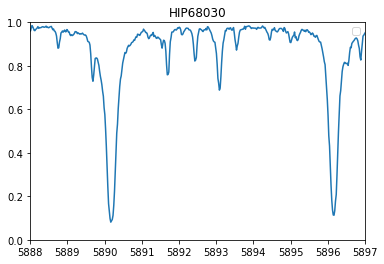

5899.98996409431
5000.005552883154
5895.98622


No handles with labels found to put in legend.


/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP68030_4_NDRU.fits
HIP68030
2020-05-29T05:31:16.21


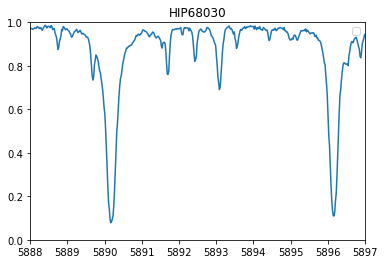

No handles with labels found to put in legend.


5899.98996409431
5000.005552883154
5895.98622
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP68030_5_NDRU.fits
HIP68030
2020-05-29T05:35:37.52


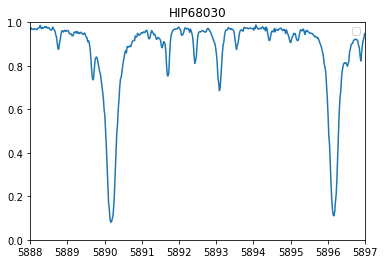

No handles with labels found to put in legend.


5899.98996409431
5000.005552883154
5895.98622
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP68030_6_NDRU.fits
HIP68030
2020-06-05T05:38:57.75


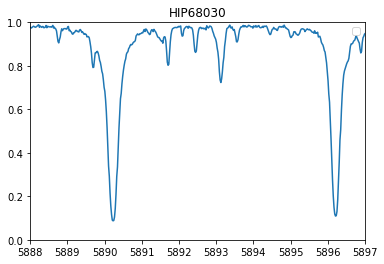

No handles with labels found to put in legend.


5899.98996409431
5000.005552883154
5895.98622
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP68030_7_NDRU.fits
HIP68030
2020-06-05T05:51:38.20


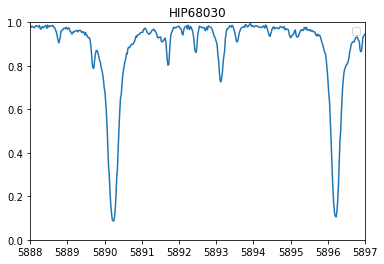

No handles with labels found to put in legend.


5899.98996409431
5000.005552883154
5895.98622
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP68030_8_NDRU.fits
HIP68030
2020-06-05T05:45:14.14


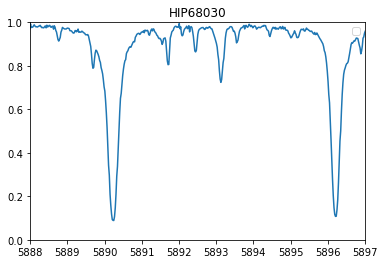

5899.98996409431
5000.005552883154
5895.98622


In [824]:
for file in observed_files:
    if 'NDRR' in file:
        continue
    subfile = fits.open(file)
    flux = subfile[0].data
    wl = subfile[1].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    # plt.axvline(observed_wl - .02, ls='--', color='gray', label = np.round(observed_wl - .02, 2))
    plt.plot(wl, flux)
    plt.xlim(observed_wl - 6, observed_wl + 6)
    plt.title(star)
    plt.xlim(5888, 5897)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()
    print(max(wl))
    print(min(wl))
    print(observed_wl- .02)

## Plot all the APF plots

HIP117463
2019-11-06T08:50:05.64
/datag/blpd0/datax/apf/rbqr.546.fits


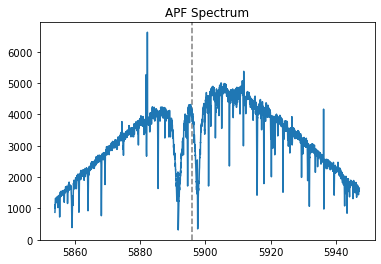

HIP117463
2019-11-06T08:55:49.85
/datag/blpd0/datax/apf/rbqr.547.fits


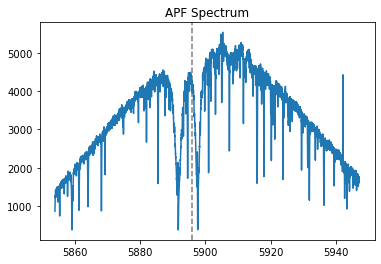

HIP117463
2019-11-06T09:01:34.06
/datag/blpd0/datax/apf/rbqr.548.fits


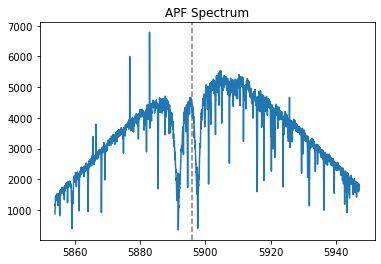

In [772]:
for file in apf_files:
    fl_file = fits.open(file)
    obj = fl_file[0].header['TOBJECT']
    date = fl_file[0].header['DATE-OBS']
    print(obj)
    print(date)
    print(file)
    fl_image = fl_file[0].data
    flux = fl_image[order][:-1]
    wl = wl_image[order]
    plt.axvline(observed_wl, ls = '--', color='gray')
    plt.plot(wl, flux)
#     plt.ylim(14000, 15000)
    # plt.xlim(observed_wl - 6, observed_wl + 6)
    plt.title('APF Spectrum')
    plt.show()

In [705]:
# # manually plot residual and SM rest frame spectrum

# identifier = 'HIP47990_2'

# file = '/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/' + identifier + '_NDRR.fits'
# rest_wl = 5576.804904

# subfile = fits.open(file)
# flux = subfile[1].data
# wl = subfile[2].data

# header = subfile[0].header
# star = header['TOBJECT']
# date = header['DATE-OBS']
# print(file)
# print(star)
# print(date)
# plt.axvline(rest_wl, ls='--', color='gray')
# plt.plot(wl, flux)
# plt.xlim(rest_wl-6, rest_wl+6)
# plt.title('Residual')
# plt.show()
    
    
# file = '/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/' + identifier + '_NDRS.fits'

# subfile = fits.open(file)
# flux = subfile[0].data
# wl = subfile[1].data

# header = subfile[0].header
# star = header['TOBJECT']
# date = header['DATE-OBS']
# print(file)
# print(star)
# print(date)
# plt.axvline(rest_wl, ls='--', color='gray')
# plt.plot(wl, flux)
# plt.xlim(rest_wl - 6, rest_wl + 6)
# plt.title('SM Rest Frame Spectrum')
# plt.show()